# 3D, STL, OBJ & Stuff

## Snippets

### Simple STL files (Discovery)

- [ ] Simplex
- [ ] Pyramid

In [22]:
facet = """
facet normal {n[0]} {n[1]} {n[2]}
    outer loop
        vertex {t[0][0]} {t[0][1]} {t[0][2]}
        vertex {t[1][0]} {t[1][1]} {t[1][2]}
        vertex {t[2][0]} {t[2][1]} {t[2][2]}
    endloop
endfacet
"""

In [23]:
import numpy as np
normal = np.array([1.0, 1.0, 1.0], dtype=np.float32)
normal /= np.linalg.norm(normal)
normal

array([0.57735026, 0.57735026, 0.57735026], dtype=float32)

In [24]:
triangle = np.array([
    [1.0, 0.0, 0.0], 
    [0.0, 1.0, 0.0], 
    [0.0, 0.0, 1.0],
], dtype=np.float32)

In [26]:
print(facet.format(n=normal, t=triangle))


facet normal 0.5773502588272095 0.5773502588272095 0.5773502588272095
    outer loop
        vertex 1.0 0.0 0.0
        vertex 0.0 1.0 0.0
        vertex 0.0 0.0 1.0
    endloop
endfacet



In [33]:
name = "simplex"

solid = f"""
solid {name}

{facet.format(n=normal, t=triangle)}

endsolid {name}
"""

print(solid)


solid simplex


facet normal 0.5773502588272095 0.5773502588272095 0.5773502588272095
    outer loop
        vertex 1.0 0.0 0.0
        vertex 0.0 1.0 0.0
        vertex 0.0 0.0 1.0
    endloop
endfacet


endsolid simplex



In [30]:
with open(f"sandbox/{name}.stl", mode="wt") as file:
    file.write(solid)

In [32]:
name = "simplex"

solid = f"""
solid {name}

{facet.format(n=-normal, t=triangle)}

endsolid {name}
"""

print(solid)


solid simplex


facet normal -0.5773502588272095 -0.5773502588272095 -0.5773502588272095
    outer loop
        vertex 1.0 0.0 0.0
        vertex 0.0 1.0 0.0
        vertex 0.0 0.0 1.0
    endloop
endfacet


endsolid simplex



In [34]:
name = "simplex-opposite-normal"
with open(f"sandbox/{name}.stl", mode="wt") as file:
    file.write(solid)

In [35]:
normal = np.array([12.0, -56.0, 456.0], dtype=np.float32)

name = "simplex"

solid = f"""
solid {name}

{facet.format(n=normal, t=triangle)}

endsolid {name}
"""

print(solid)


name = "simplex-random-normal"
with open(f"sandbox/{name}.stl", mode="wt") as file:
    file.write(solid)


solid simplex


facet normal -12.0 56.0 -456.0
    outer loop
        vertex 1.0 0.0 0.0
        vertex 0.0 1.0 0.0
        vertex 0.0 0.0 1.0
    endloop
endfacet


endsolid simplex



In [ ]:
normal = np.array([0.0, 0.0, 0.0], dtype=np.float32)

name = "simplex"

solid = f"""
solid {name}

{facet.format(n=normal, t=triangle)}

endsolid {name}
"""

print(solid)


name = "simplex-zero-normal"
with open(f"sandbox/{name}.stl", mode="wt") as file:
    file.write(solid)

**TODO** warning about the behavior of the readers wrt normals and outer/inner representation.
Inner may be displayed as outer or not at all and the normal may not be used.


### Generate the canonical CSG example

Copy-paste the code, then check STL file with an external viewer.

In [1]:
from sdf import *

f = sphere(1) & box(1.5)

c = cylinder(0.5)
f -= c.orient(X) | c.orient(Y) | c.orient(Z)

f.save("out.stl")

min -0.84543, -0.84543, -0.84543
max 0.845431, 0.845431, 0.845431
step 0.0104847, 0.0104847, 0.0104847
4657463 samples in 216 batches with 12 workers
  100% (216 of 216) [##############################] 0:00:01 0:00:00    
44 skipped, 60 empty, 112 nonempty
291028 triangles in 0.819758 seconds


### Binary STL

- [ ] Discover that `out.stl` is not ASCII text, but binary
- [ ] Read about binary STL online
- [ ] Ask if there is anything useful in the first 80 bytes (header)
- [ ] Read the number of triangles `n` (hint to `numpy.fromfile`); check that works out.
- [ ] Check that the lenth of the binary data checks out with this count and the spec
- [ ] Read the numeric data as a `(n, 12)` array of `float32`
- [ ] Extract from this array the `normals` (shape `(n, 3)`) and `vertices` (shape `(n, 3, 3)`) arrays.

In [2]:
with open("out.stl", mode="rb") as file:
    print(file.read(200))

b'\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xd4p\x04\x00\x81g0\xbf\xa2.\x03\xbf\xa2.\x03\xbfB+0\xbf+\x8a\x02\xbf\x88!\x04\xbfB+0\xbf\x88!\x04\xbf+\x8a\x02\xbf1Z1\xbf+\x8a\x02\xbf+\x8a\x02\xbf\x00\x00\xbb\x0b.\xbf\x1f\x13\x06\xbflh\x03\xbf#|-\xbfJ9\x05\xbf\xf9\x00\x05\xbf#|-\xbf\x8c\xa3\x07\xbf+\x8a\x02\xbfhX/\xbfJ9\x05\xbf+\x8a\x02\xbf\x00\x00\xbb\x0b.\xbflh\x03\xbf\x1f\x13\x06\xbf#|-\xbf'


In [3]:
with open("out.stl", mode="rb") as file:
    header = file.read(80)
header == 80 * bytes([0])

True

In [4]:
import numpy as np
with open("out.stl", mode="rb") as file:
    n = np.fromfile(file, dtype=np.uint32, count=1, offset=80)
n[0]

np.uint32(291028)

In [5]:
# Alternative (better): read header, then the offset not necessary
# TODO: warn about "cursor" and offset with numpy.fromfile for something partially read
# Suggest a little experiment maybe to discover what's going on.
import numpy as np
with open("out.stl", mode="rb") as file:
    header = file.read(80)
    n = np.fromfile(file, dtype=np.uint32, count=1)[0]
print(n)

291028


In [6]:
import numpy as np
with open("out.stl", mode="rb") as file:
    data = file.read()
    print(len(data))
    print(80 + 4 + n * (4*4*3 + 2))

14551484
14551484


In [7]:
import numpy as np
with open("out.stl", mode="rb") as file:
    header = file.read(80)
    n = np.fromfile(file, dtype=np.uint32, count=1)[0]
    data = np.empty((n, 4 * 3), dtype=np.float32)
    for i in range(n):
        data[i] = np.fromfile(file, dtype=np.float32, count=12)
        _ = file.read(2)

In [10]:
normals = data[:,0::4]
x = data[:,1::4]
y = data[:,2::4]
z = data[:,3::4]
vertices = np.stack((x, y, z), axis=1)
np.shape(vertices)

(291028, 3, 3)

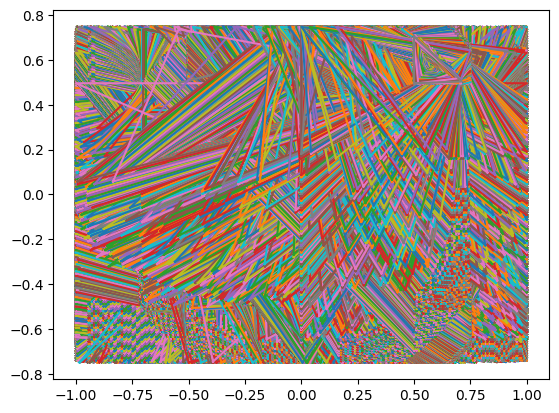

In [12]:
fig = plt.figure()
for i in range(n):
    vs = vertices[i]
    x = [v[0] for v in vs]
    y = [v[1] for v in vs]
    x.append(x[0])
    y.append(y[0])
    plt.plot(x, y)

### Matplotlib 3D first try

Mmmm there is some `meshio` stuff here. Too complex actually, lead the students to make their own micro-matplotlib3d.

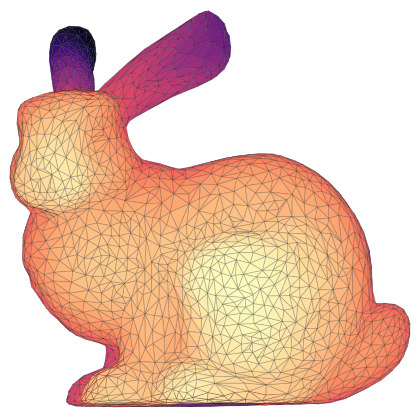

In [8]:
import numpy as np
from mpl3d import glm
from mpl3d.mesh import Mesh
from mpl3d.camera import Camera
import meshio
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(4,4))
ax = fig.add_axes([0,0,1,1], xlim=[-1,+1], ylim=[-1,+1], aspect=1)
ax.axis("off")

camera = Camera("ortho", scale=2)
mesh = meshio.read("data/bunny.obj")
vertices = mesh.points
faces = mesh.cells[0].data
vertices = glm.fit_unit_cube(vertices)
mesh = Mesh(ax, camera.transform, vertices, faces,
            cmap=plt.get_cmap("magma"),  edgecolors=(0,0,0,0.25))
plt.savefig("bunny.png", dpi=600)
plt.show()


## Ideas

dsjkdsj

- [x] item A
- [ ] item B

## Info / References

### Online 3D Viewer

  - [Online 3D Viewer](https://3dviewer.net/)

### Meshview

Install with `go install github.com/fogleman/meshview/cmd/meshview@latest`